## Programmatically implement the method of approximate divergence using an interpolation Newtonian polynomial to find the first and second derivatives for given values of the argument for a function. 

In [1]:
import sympy as sp
import math
import matplotlib.pyplot as plt

def nested_deff(yi):
    delY=[]
    delY_S=[]
    while len(yi) > 1:
        yi = [yi[i] - yi[i-1]
        for i in range(1, len(yi))]
        delY.append(yi[0])
        delY_S.append(yi[-1])
    return delY,delY_S

def newton_first(x, xi, yi,IsDiff):
    t = sp.Symbol('t')
    h = xi[1] - xi[0]
    n = len(yi)
    
    if(IsDiff==1):
        y1 = 1/h
    else:
        y1 = 1/math.pow(h,2)

    b = nested_deff(yi)
    all_diff = b[0]
    t1 = (x-xi[0])/h   

    y = 0
    for i in range(0, n-1):
        
        diff = all_diff[i]
        p = 1
        for j in range(i+1):
            p *= (t - j)
        p= sp.expand(p)

        if(IsDiff==1):
            p=sp.diff(p,t)
            
        else:
            p=sp.diff(p,t)
            p=sp.diff(p,t)
   
        g = p.subs(t, t1) 
        y += diff*g / (math.factorial(i+1))     
                 
    return y * y1

In [2]:
x_values = [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0]  
y_values = [10.517, 10.193, 9.807, 9.387, 8.977, 8.637, 8,442, 8.482, 8.862, 9.701, 11.132, 13.302] 
X = [2.72, 4.81, 4.62, 4.59]

for i in X:
    result_first_form = newton_first(i, x_values, y_values,1)
    print(f"The first derivative of x={i}:", result_first_form)
    result_first_form = newton_first(i, x_values, y_values,2)
    print(f"The second derivative of x={i}:", result_first_form, '\n')

Y_values_first_derivative = [newton_first(x, x_values, y_values, 1) for x in x_values]
Y_values_second_derivative = [newton_first(x, x_values, y_values, 2) for x in x_values]

The first derivative of x=2.72: -163.239959879664
The second derivative of x=2.72: -7640.96526553325 

The first derivative of x=4.81: 970.738033933756
The second derivative of x=4.81: -2073.42139835755 

The first derivative of x=4.62: 1018.51877744765
The second derivative of x=4.62: 1465.98608754997 

The first derivative of x=4.59: 967.564460528015
The second derivative of x=4.59: 1923.32173848706 



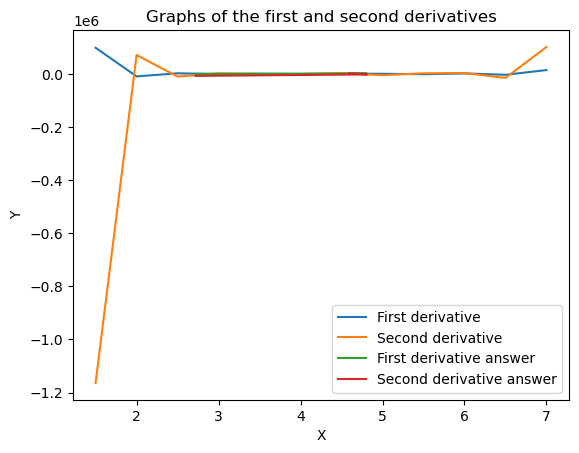

In [3]:
Y_values_first_answer = [newton_first(x, x_values, y_values, 1) for x in X]
Y_values_second_answer = [newton_first(x, x_values, y_values, 2) for x in X]

# Graph of the first derivative
plt.plot(x_values, Y_values_first_derivative, label='First derivative')

# Graph of the second derivative
plt.plot(x_values, Y_values_second_derivative, label='Second derivative')

plt.plot(X, Y_values_first_answer, label='First derivative answer')

# Graph of the second derivative
plt.plot(X, Y_values_second_answer, label='Second derivative answer')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Graphs of the first and second derivatives')
plt.legend()
plt.show()